<a href="https://colab.research.google.com/github/VictorDu1990/Keras_TensorFlow_DL_demo/blob/master/keras_CNN_CIFAR10_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#CIFAR-10数据下载与分析
#一、数据预处理
from keras.datasets import cifar10
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [0]:
(x_img_train, y_label_train),(x_img_test, x_label_test) = cifar10.load_data()
x_img_train.shape
#y_label_train.shape

(50000, 32, 32, 3)

In [0]:
label_dict = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 
             5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

%matplotlib inline
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
  fig = gcf()
  fig.set_size_inches(12, 14)
  if num > 25: num=25
  for i in range(0, num):
    ax = plt.subplot(5,5,1+i)
    ax.imshow(images[idx], cmap='binary')
    title = str(i)+','+label_dict[labels[i][0]]
    
    if len(prediction) > 0:
      title += '=>'+label_dict[prediction[i]]
    ax.set_title(title, fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    idx += 1
    
  plt.show()
  

In [0]:
#一、数据预处理
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

(x_img_train, y_label_train),(x_img_test, y_label_test) = cifar10.load_data()

x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)


In [0]:
#二、建立模型
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, ZeroPadding2D

def CNN_Net():
	# 定义模型
    model = Sequential()
    # conv1
    model.add(Conv2D(32,(3,3),strides=(1,1),input_shape=(32,32,3),padding='same',activation='relu',kernel_initializer='uniform'))
    #dropout
    model.add(Dropout(0.25))
    # max1
    model.add(MaxPooling2D(pool_size=(2,2)))
    # conv2
    model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
    #dropout
    model.add(Dropout(0.25))
    # max2
    model.add(MaxPooling2D(pool_size=(2,2)))
    # 多通道压平
    model.add(Flatten())
    # fc1
    model.add(Dense(1024,activation='relu'))
    #dropout
    model.add(Dropout(0.25))
    # fc2
    model.add(Dense(10,activation='softmax'))
    return model

model = CNN_Net()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxP

In [0]:
#三、训练模型
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_img_train_normalize, y=y_label_train_OneHot, validation_split=0.2, epochs=5, batch_size=128, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/5
 - 137s - loss: 1.5475 - acc: 0.4429 - val_loss: 1.3639 - val_acc: 0.5522
Epoch 2/5
 - 136s - loss: 1.1907 - acc: 0.5783 - val_loss: 1.1924 - val_acc: 0.6020
Epoch 3/5
 - 136s - loss: 1.0248 - acc: 0.6391 - val_loss: 1.0816 - val_acc: 0.6327
Epoch 4/5
 - 136s - loss: 0.9225 - acc: 0.6748 - val_loss: 1.0112 - val_acc: 0.6703
Epoch 5/5
 - 135s - loss: 0.8221 - acc: 0.7104 - val_loss: 0.9674 - val_acc: 0.6713


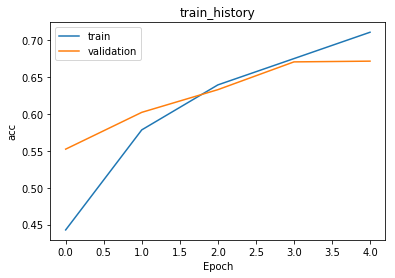

In [0]:
#03.显示训练过程
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('train_history')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

show_train_history(train_history, 'acc', 'val_acc')

In [0]:
#四、评估模型准确率
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
scores[1]

10000/10000 [==============================] - 10s 962us/step


0.6676

In [0]:
#五、进行预测
predicted_Probability = model.predict(x_img_test_normalize)
prediction = model.predict_classes(x_img_test_normalize)

import pandas as pd
pd.crosstab(y_label_test.reshape(-1), prediction, rownames=['labels'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
labels,,,,,,,,,,
0,711,9,96,27,24,7,7,8,89,22
1,35,706,27,31,7,13,16,14,42,109
2,50,2,657,61,105,49,35,27,12,2
3,10,4,130,496,115,155,50,27,7,6
4,21,1,119,51,719,22,20,34,12,1
5,9,1,123,171,95,548,13,33,6,1
6,3,1,106,63,116,25,681,3,1,1
7,12,2,62,42,117,57,6,696,3,3
8,55,29,44,26,19,12,10,4,789,12


In [0]:
#六、模型的保存与加载
model.save_weights("/content/cifarCnnModel.h5")
print("Saved model to disk.")
try:
  model.load_weights("/content/cifarCnnModel.h5")
  print("模型加载成功！")
except:
  print("模型加载失败！")

Saved model to disk.
模型加载成功！
